## Loading the Dataset

We start by loading the dataset from the previous week. I'll set the `customerID` as the index column.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../1 - Data Cleaning/clean_data.csv', index_col='customerID')
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## Preparing the dataset

In [3]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,tenure,ChargesMonthly,ChargesTotal,Churn_Yes,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,9,65.6,593.30,0,0,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
0003-MKNFE,9,59.9,542.40,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
0004-TLHLJ,4,73.9,280.85,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
0011-IGKFF,13,98.0,1237.85,1,1,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
0013-EXCHZ,3,83.9,267.40,1,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


Let's look at features correlation, we don't want our features to have a strong correlation among them.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

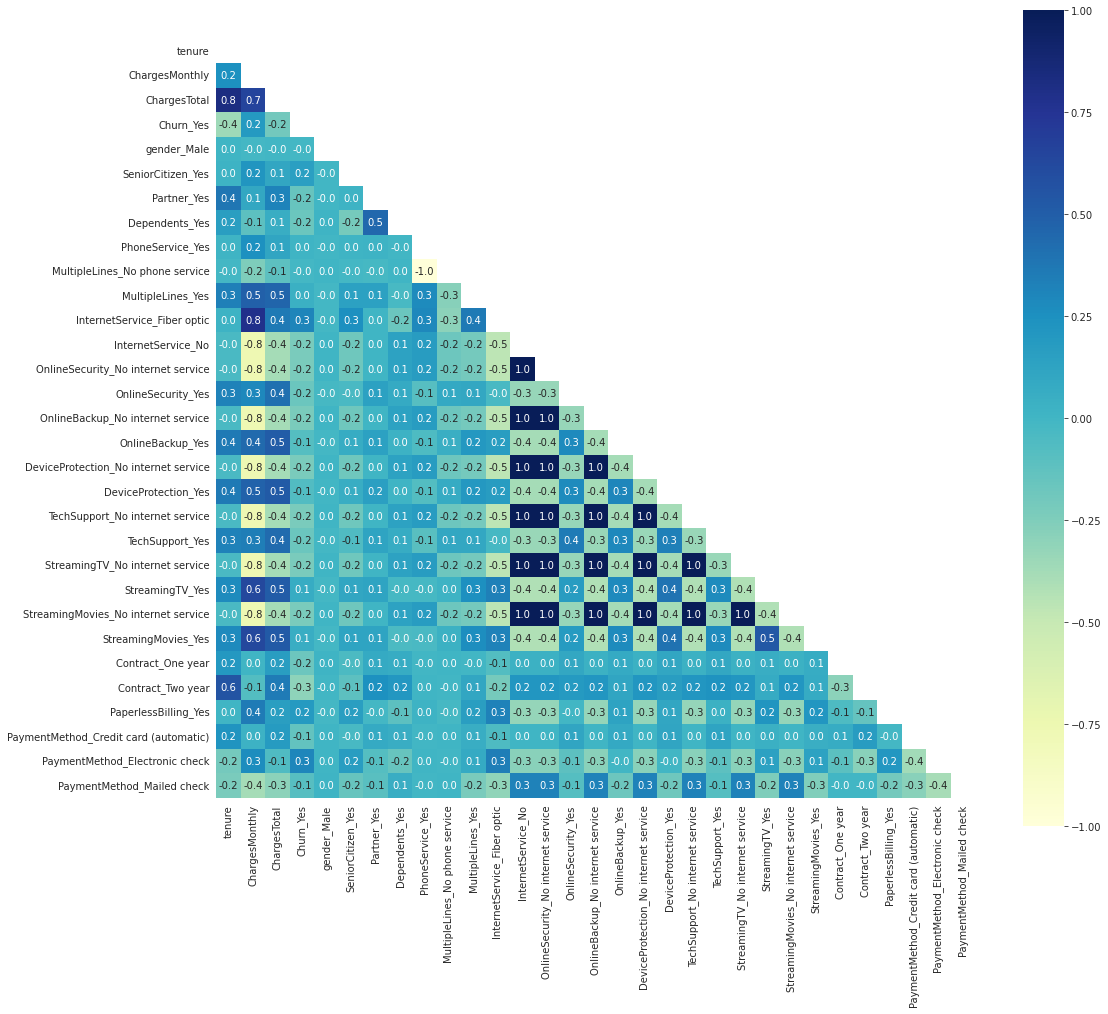

In [5]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 15))
    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, fmt = ".1f", vmin=-1, vmax=1, cmap='YlGnBu')

We can see that the `InternetService_No` feature has a lot of strong correlations with many other  features, this is because these other features depend on the client having internet service. So I'll drop all features that are dependent on this one. The same thing happens with `PhoneService_Yes`.

`tenure` and `ChargesTotal` also have a strong correlation, but I'll try running the models with the two features, as I think they are both important.

In [6]:
data.drop(columns=['ChargesMonthly', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                    'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                    'StreamingMovies_No internet service', 'MultipleLines_No phone service'], inplace=True)

I'll normalize `ChargesTotal` and `tenure`.

In [7]:
def NormalizeColumn(data, column):
    return (data[column] - np.min(data[column])) / (np.max(data[column]) - np.min(data[column]))

In [8]:
data.ChargesTotal = NormalizeColumn(data, 'ChargesTotal')
data.tenure = NormalizeColumn(data, 'tenure')

data.head()

,tenure,ChargesTotal,Churn_Yes,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0.125000,0.068315,0,0,0,1,1,1,0,0,...,0,1,1,0,1,0,1,0,0,1
0003-MKNFE,0.125000,0.062454,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
0004-TLHLJ,0.055556,0.032338,1,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
0011-IGKFF,0.180556,0.142531,1,1,1,1,0,1,0,1,...,1,0,1,1,0,0,1,0,1,0
0013-EXCHZ,0.041667,0.030789,1,0,1,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,1


## Splitting into test and train data

In [9]:
y = data.Churn_Yes
x = data.drop(columns='Churn_Yes')

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22, stratify=y, shuffle=True)

## Oversampling with SMOTE on training set

In [11]:
from imblearn.over_sampling import SMOTE 

In [12]:
smote = SMOTE(random_state=22)
x_train, y_train = smote.fit_resample(x_train, y_train)

## Baseline Model

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [14]:
baseline = DummyClassifier(strategy="constant", constant=0)
baseline.fit(x_train, y_train)

y_baseline = baseline.predict(x_test)

baseline_acc_score = accuracy_score(y_test, y_baseline)
baseline_pre_score = precision_score(y_test, y_baseline, zero_division=0)
baseline_rc_score = recall_score(y_test, y_baseline, zero_division=0)
baseline_f1_score = f1_score(y_test, y_baseline, zero_division=0)
print('Baseline Accuracy Score: {:0.5} \nBaseline Precision Score: {:0.5} \nBaseline Recall Score: {:0.5} \nBaseline F1 Score: {:0.5}'.\
    format(baseline_acc_score, baseline_pre_score, baseline_rc_score, baseline_f1_score))

Baseline Accuracy Score: 0.73456 
Baseline Precision Score: 0.0 
Baseline Recall Score: 0.0 
Baseline F1 Score: 0.0


## Model 1

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [16]:
model1_s = RandomForestClassifier(random_state=22)
parameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'max_leaf_nodes': [70, 75, 80]
}]

clf = GridSearchCV(model1_s, param_grid=parameters, cv=5, scoring='recall')
clf.fit(x_train, y_train)

print(clf.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=70,
                       random_state=22)


In [17]:
model1 = RandomForestClassifier(**clf.best_params_, random_state=22)
model1.fit(x_train, y_train)

y_model1 = model1.predict(x_test)

model1_acc_score = accuracy_score(y_test, y_model1)
model1_pre_score = precision_score(y_test, y_model1)
model1_rc_score = recall_score(y_test, y_model1)
model1_f1_score = f1_score(y_test, y_model1)
print('Model 1 Accuracy Score: {:0.5} \nModel 1 Precision Score: {:0.5} \nModel 1 Recall Score: {:0.5} \nModel 1 F1 Score: {:0.5}'.\
    format(model1_acc_score, model1_pre_score, model1_rc_score, model1_f1_score))

Model 1 Accuracy Score: 0.72534 
Model 1 Precision Score: 0.48922 
Model 1 Recall Score: 0.78877 
Model 1 F1 Score: 0.60389


## Model 2

In [18]:
from sklearn.svm import LinearSVC

In [19]:
model2 = LinearSVC(max_iter=900000, random_state=22)
model2.fit(x_train, y_train)

y_model2 = model2.predict(x_test)

model2_acc_score = accuracy_score(y_test, y_model2)
model2_pre_score = precision_score(y_test, y_model2)
model2_rc_score = recall_score(y_test, y_model2)
model2_f1_score = f1_score(y_test, y_model2)
print('Model 2 Accuracy Score: {:0.5} \nModel 2 Precision Score: {:0.5} \nModel 2 Recall Score: {:0.5} \nModel 2 F1 Score: {:0.5}'.\
    format(model2_acc_score, model2_pre_score, model2_rc_score, model2_f1_score))

Model 2 Accuracy Score: 0.71966 
Model 2 Precision Score: 0.48217 
Model 2 Recall Score: 0.75936 
Model 2 F1 Score: 0.58982


## Model 3

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
model3_s = MLPClassifier(random_state=22, max_iter=9999)
parameters = [{
    'hidden_layer_sizes': [(2,2), (1,), (2,1)],
    'solver': ['lbfgs']
}]

clf = GridSearchCV(model3_s, param_grid=parameters, cv=5, scoring='recall')
clf.fit(x_train, y_train)

print(clf.best_estimator_)

MLPClassifier(hidden_layer_sizes=(1,), max_iter=9999, random_state=22,
              solver='lbfgs')


In [22]:
model3 = MLPClassifier(**clf.best_params_, max_iter=9999, random_state=22)
model3.fit(x_train, y_train)

y_model3 = model3.predict(x_test)

model3_acc_score = accuracy_score(y_test, y_model3)
model3_pre_score = precision_score(y_test, y_model3)
model3_rc_score = recall_score(y_test, y_model3)
model3_f1_score = f1_score(y_test, y_model3)
print('Model 3 Accuracy Score: {:0.5} \nModel 3 Precision Score: {:0.5} \nModel 3 Recall Score: {:0.5} \nModel 3 F1 Score: {:0.5}'.\
    format(model3_acc_score, model3_pre_score, model3_rc_score, model3_f1_score))

Model 3 Accuracy Score: 0.72818 
Model 3 Precision Score: 0.49133 
Model 3 Recall Score: 0.68182 
Model 3 F1 Score: 0.57111


## Conclusion

In [23]:
results = pd.DataFrame({
    'Accuracy': [baseline_acc_score, model1_acc_score, model2_acc_score, model3_acc_score],
    'Precision': [baseline_pre_score, model1_pre_score, model2_pre_score, model3_pre_score],
    'Recall': [baseline_rc_score, model1_rc_score, model2_rc_score, model3_rc_score],
    'F1 Score': [baseline_f1_score, model1_f1_score, model2_f1_score, model3_f1_score]
},
    index=['Baseline', 'Model 1', 'Model 2', 'Model 3'])
results.sort_values(['Recall', 'F1 Score'], ascending=False)

,Accuracy,Precision,Recall,F1 Score
Model 1,0.725337,0.489221,0.788770,0.603889
Model 2,0.719659,0.482173,0.759358,0.589823
Model 3,0.728176,0.491329,0.681818,0.571109
Baseline,0.734564,0.000000,0.000000,0.000000


The recall score is the most important metric in this case because we want to find the clients that are more likely to churn so we can learn what they need to be happier with the company. So Model 1, the Random Forest, is the best model for our case.